### Лабараторная работа №4
Выполнил: студент гр.6231-010402D Гершевский Е.В.

In [59]:
import pandas as pd
import numpy as np
import scipy.stats as st

pd.set_option('display.max_columns', None)

In [2]:
fifa = pd.read_csv('../Lab1/Data/players_20.csv')
fifa

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [30]:
fifa.age.sum()

462128

Приняв за ```n = 200```, найдем стандартную ошибку и среднее значение выборочного распределения.

In [29]:
n = 200
sam_mean = np.mean(fifa.age)
sigma = np.std(fifa.age)
std_error = sigma/np.sqrt(n)
print("Sample Mean: %2.2f" %sam_mean)
print("Standard Deviation: %2.2f" %sigma)
print("Standard Error: %2.2f" %std_error)

Sample Mean: 25.28
Standard Deviation: 4.66
Standard Error: 0.33


In [49]:
pop_mean = pd.DataFrame.mean(fifa, axis=0, numeric_only=True)
pop_mean

sofifa_id                  219738.864482
age                            25.283291
height_cm                     181.362184
weight_kg                      75.276343
overall                        66.244994
                               ...      
goalkeeping_diving             16.572765
goalkeeping_handling           16.354853
goalkeeping_kicking            16.212934
goalkeeping_positioning        16.368038
goalkeeping_reflexes           16.709924
Length: 61, dtype: float64

In [50]:
pe = np.mean(len(fifa))
pe

18278.0

In [51]:
sam_error = abs(pop_mean - pe)
sam_error

sofifa_id                  201460.864482
age                         18252.716709
height_cm                   18096.637816
weight_kg                   18202.723657
overall                     18211.755006
                               ...      
goalkeeping_diving          18261.427235
goalkeeping_handling        18261.645147
goalkeeping_kicking         18261.787066
goalkeeping_positioning     18261.631962
goalkeeping_reflexes        18261.290076
Length: 61, dtype: float64

По мере того, как размер выборки ```n``` становится все больше и больше, средние значения выборки имеют тенденцию следовать нормальному распределению, которое в конечном итоге имеет тенденцию группироваться вокруг истинного среднего значения генеральной совокупности.

Средний рейтинг игроков выше 80?

In [54]:
np.mean(fifa.overall)

66.24499398183609

Нет никаких доказательств того, что общий рейтинг игроков выше 80.

Определим, влияет ли предпочитаемая стопа на потенциал игрока.

In [56]:
fifa['preferred_foot'].value_counts() #cateogrical 

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

In [57]:
fifa['potential'].mean()

71.5468869679396

In [61]:
crit_f= st.f.isf(0.05, dfn=1, dfd=13960)
crit_f

3.8421250333340033

In [62]:
test_stat, pvalue= st.f_oneway(fifa[fifa['preferred_foot']=='Right']['potential'],
                               fifa[fifa['preferred_foot']=='Left']['potential'])
test_stat

17.150924378337823

<AxesSubplot:xlabel='preferred_foot'>

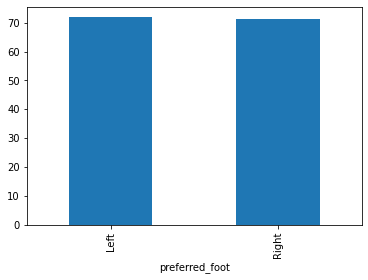

In [64]:
fifa.groupby('preferred_foot')['potential'].mean().plot(kind='bar')

По графическому представлению можно сказать, что предпочтительная стопа не влияет на потенциал игрока.

Влияет ли умение двигаться ("финтить") на общий рейтинг?

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall'>

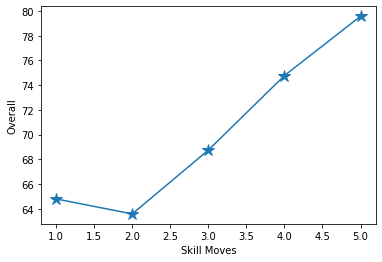

In [70]:
fifa.groupby('skill_moves')['overall'].mean().plot(marker = '*' , markersize = 12, xlabel = 'Skill Moves', ylabel = 'Overall')

Из графика видно, что умение "финтить" с оценкой в 4 балла дает игрокам в среднем рейтинг выше 75 